In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]
(100, 2) (100, 1)


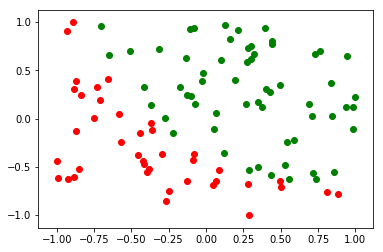

In [36]:
dataset = pd.read_csv('./data.csv')
dataset = dataset.sample(frac=1)
data_x = dataset.iloc[:,1:-1].values
data_y = dataset.iloc[:,-1].values.reshape([-1,1])

print(data_x.shape, data_y.shape)
for i in range(data_x.shape[0]):
    if data_y[i][0] == 0:
        plt.scatter(data_x[i][0],data_x[i][1], color = 'red')
    else:
        plt.scatter(data_x[i][0],data_x[i][1], color = 'green')

# 线性模型 逻辑回归

In [40]:
class logistic_regression:
    def __init__(self, num_features):
        self.w = np.random.randn(num_features,1)
        self.b = np.random.randn(1,1)
        self.wb = np.row_stack([self.w,self.b])
        
    def predict(self, x, stack=True):  
        if stack:
            x = np.column_stack([x,np.ones(x.shape[0])])
        y_pred = 1/(np.exp(-np.dot(x, self.wb))+1)
        return y_pred

    def fit(self, train_x, train_y, ):
        self.wb = np.random.random(self.wb.shape)
        train_x = np.column_stack([train_x,np.ones(train_x.shape[0])])
        for i in range(1000):
            d_wb =  np.dot(np.transpose(train_x), (self.predict(train_x,stack=False) - train_y))/train_x.shape[0]
            self.wb = self.wb - 0.01*d_wb

In [42]:

model = logistic_regression(2)
model.fit(data_x, data_y)
pred = model.predict(data_x)


预测结果

[[-0.42582793 -0.08332778]
 [ 0.22392499 -0.42318749]
 [-0.05999918  0.89097661]
 ...
 [-0.52868291 -0.38176382]
 [ 0.79926    -0.16244888]
 [-0.45654653 -0.45441249]]


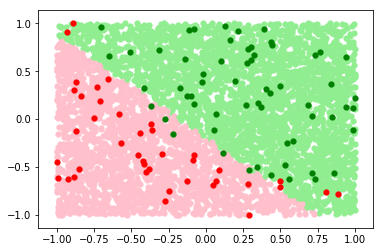

In [35]:
x = [random.uniform(-1,1) for i in range(10000)]
x = np.asarray(x).reshape([-1,2])
print(x)
y_p = model.predict(x)

for i in range(x.shape[0]):
    if y_p[i][0] <0.5:
        plt.scatter(x[i][0],x[i][1], color = 'pink',linewidths=0.2)
    else:
        plt.scatter(x[i][0],x[i][1], color = 'lightgreen',linewidths=0.2)
        
for i in range(data_x.shape[0]):
    if data_y[i][0] <0.5:
        plt.scatter(data_x[i][0],data_x[i][1], color = 'red',linewidths=0.2)
    else:
        plt.scatter(data_x[i][0],data_x[i][1], color = 'green',linewidths=0.2)

# SVM

In [19]:
from sklearn import svm
clf = svm.SVC()
clf.fit(data_x[:,0:-1], data_y)  

clf.predict([[0.8, 0.1],[-0.3,-0.3]])

/home/sjh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sjh/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1., 0.])

[[ 0.58121143 -0.97873928]
 [-0.34968756 -0.92403296]
 [-0.21219819 -0.64573284]
 ...
 [ 0.27681831  0.49034797]
 [-0.18111523  0.89734029]
 [ 0.29177325  0.86841639]]


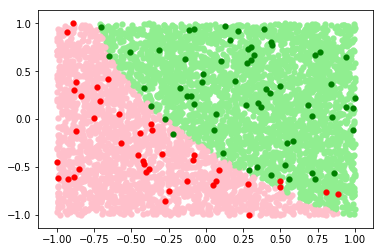

In [20]:
x = [random.uniform(-1,1) for i in range(10000)]
x = np.asarray(x).reshape([-1,2])
print(x)
y_p = clf.predict(x)

for i in range(x.shape[0]):
    if y_p[i] < 0.5 :
        plt.scatter(x[i][0],x[i][1], color = 'pink',linewidths=0.2)
    else:
        plt.scatter(x[i][0],x[i][1], color = 'lightgreen',linewidths=0.2)
        
for i in range(data_x.shape[0]):
    if data_y[i][0] <0.5:
        plt.scatter(data_x[i][0],data_x[i][1], color = 'red',linewidths=0.2)
    else:
        plt.scatter(data_x[i][0],data_x[i][1], color = 'green',linewidths=0.2)

In [11]:
print(clf.n_support_)
print(clf.support_vectors_)

[22 21]
[[ 0.49951712 -0.70658991]
 [ 0.4954439  -0.64501847]
 [ 0.80755162 -0.75983985]
 [ 0.06962078 -0.64154501]
 [-0.70823529  0.18842124]
 [-0.65553108  0.41333609]
 [ 0.28867586 -1.        ]
 [-0.88944443  1.        ]
 [-0.92780815  0.90417251]
 [-0.86914432  0.38930975]
 [-0.44021428 -0.14435842]
 [-0.0779906  -0.37135105]
 [-0.58120564  0.05020749]
 [-0.29549598 -0.36687171]
 [-0.08924114 -0.4242289 ]
 [-0.72826006  0.3310706 ]
 [ 0.88630192 -0.77669717]
 [ 0.08609881 -0.52904022]
 [-0.36793859 -0.04713098]
 [-0.36105806 -0.11621698]
 [ 0.04636883 -0.69270769]
 [ 0.28224305 -0.6786065 ]
 [-0.22086112 -0.15299137]
 [-0.50678846  0.69549865]
 [-0.27528896  0.00573017]
 [ 0.43706612 -0.5834433 ]
 [ 0.7138544  -0.56772088]
 [ 0.53163477 -0.47918502]
 [ 0.11829901 -0.35144433]
 [-0.31453174  0.71692904]
 [-0.12858009  0.24488406]
 [ 0.34500817 -0.50274932]
 [-0.17493101  0.3258451 ]
 [ 0.73394662 -0.62536823]
 [-0.70190992  0.96091035]
 [ 0.28899369 -0.53268948]
 [ 0.85686054 -0.557